In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

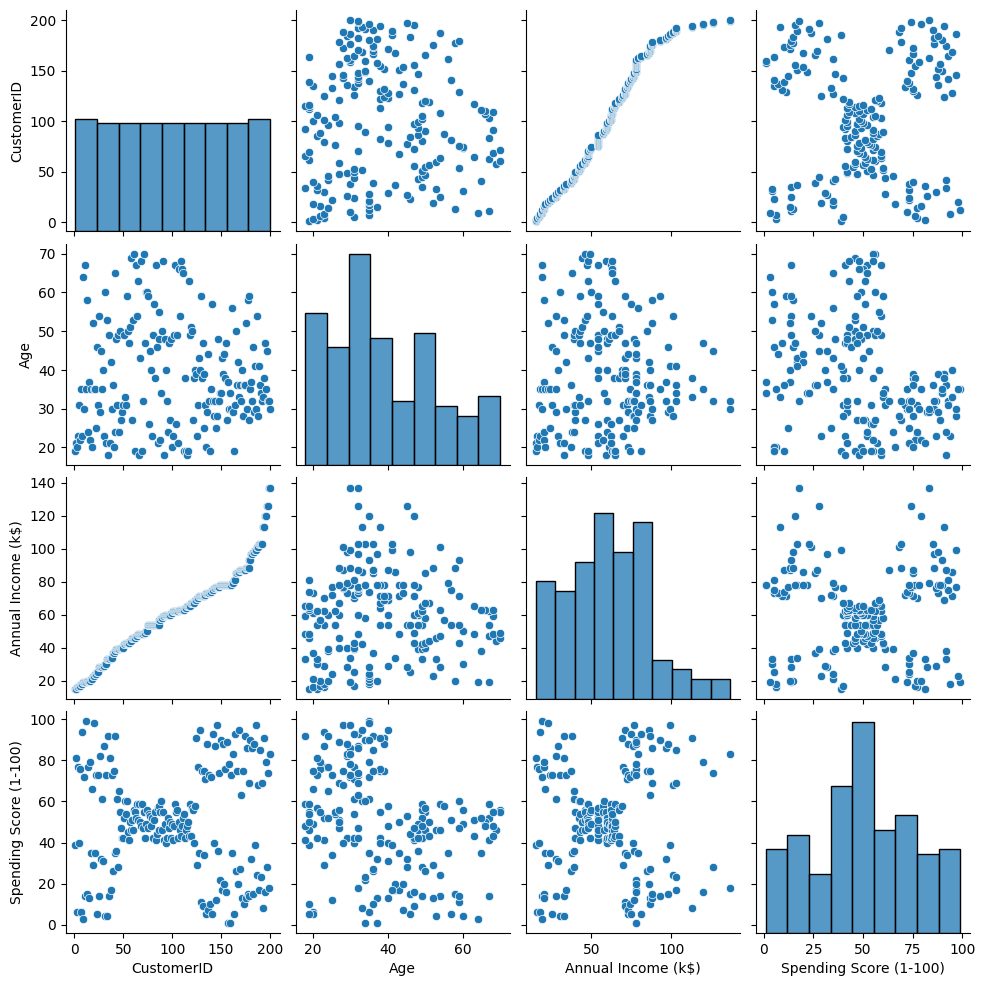

In [5]:
sns.pairplot(df)

In [7]:
x= df.iloc[:,[3,4]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
x_new = sc.fit_transform(x)
x_new

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [11]:
wcss=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_new)
    wcss.append(kmeans.inertia_)

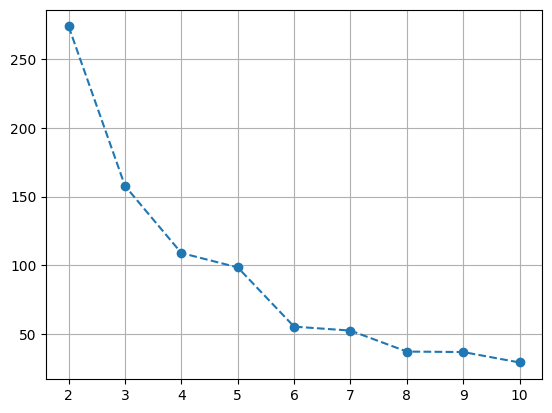

In [12]:
plt.plot(range(2,11),wcss,"o--")
plt.grid()
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5,random_state=42)
ylabel = kmeans.fit_predict(x_new)

In [14]:
ylabel

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [15]:
kmeans.cluster_centers_

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [16]:
df['ylabel']=ylabel

In [17]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),ylabel
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


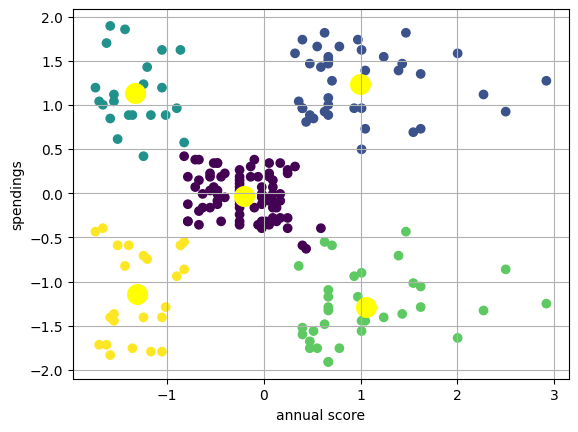

In [18]:
plt.scatter(x_new[:,0],x_new[:,1],c=ylabel)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c="yellow")
plt.xlabel("annual score")
plt.ylabel("spendings")
plt.grid()
plt.show()

In [19]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ylabel
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.400000
std,57.879185,13.969007,26.264721,25.823522,1.449311
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


In [ ]:
df[df['ylabel']==4].describe() #yellow

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ylabel
count,23.00000,23.000000,23.000000,23.000000,23.0
mean,23.00000,45.217391,26.304348,20.913043,4.0
std,13.56466,13.228607,7.893811,13.017167,0.0
min,1.00000,19.000000,15.000000,3.000000,4.0
25%,12.00000,35.500000,19.500000,9.500000,4.0
50%,23.00000,46.000000,25.000000,17.000000,4.0
75%,34.00000,53.500000,33.000000,33.500000,4.0
max,45.00000,67.000000,39.000000,40.000000,4.0


In [ ]:
df[df['ylabel']==3].describe() #green

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ylabel
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,164.371429,41.114286,88.200000,17.114286,3.0
std,21.457325,11.341676,16.399067,9.952154,0.0
min,125.000000,19.000000,70.000000,1.000000,3.0
25%,148.000000,34.000000,77.500000,10.000000,3.0
50%,165.000000,42.000000,85.000000,16.000000,3.0
75%,182.000000,47.500000,97.500000,23.500000,3.0
max,199.000000,59.000000,137.000000,39.000000,3.0


In [23]:
df[df['ylabel']==2].describe() #grey

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ylabel
count,22.000000,22.000000,22.000000,22.000000,22.0
mean,23.090909,25.272727,25.727273,79.363636,2.0
std,13.147185,5.257030,7.566731,10.504174,0.0
min,2.000000,18.000000,15.000000,61.000000,2.0
25%,12.500000,21.250000,19.250000,73.000000,2.0
50%,23.000000,23.500000,24.500000,77.000000,2.0
75%,33.500000,29.750000,32.250000,85.750000,2.0
max,46.000000,35.000000,39.000000,99.000000,2.0


In [25]:
df[df['ylabel']==1].describe() #dark blue

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ylabel
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,32.692308,86.538462,82.128205,1.0
std,22.803509,3.728650,16.312485,9.364489,0.0
min,124.000000,27.000000,69.000000,63.000000,1.0
25%,143.000000,30.000000,75.500000,74.500000,1.0
50%,162.000000,32.000000,79.000000,83.000000,1.0
75%,181.000000,35.500000,95.000000,90.000000,1.0
max,200.000000,40.000000,137.000000,97.000000,1.0


In [27]:
df[df['ylabel']==0].describe() # purple

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),ylabel
count,81.000000,81.000000,81.000000,81.000000,81.0
mean,86.320988,42.716049,55.296296,49.518519,0.0
std,24.240889,16.447822,8.988109,6.530909,0.0
min,44.000000,18.000000,39.000000,34.000000,0.0
25%,66.000000,27.000000,48.000000,44.000000,0.0
50%,86.000000,46.000000,54.000000,50.000000,0.0
75%,106.000000,54.000000,62.000000,55.000000,0.0
max,143.000000,70.000000,76.000000,61.000000,0.0


In [28]:
from sklearn.metrics import silhouette_score

In [29]:
avg_sil_score = silhouette_score(x_new,ylabel)
avg_sil_score

0.5546571631111091

In [32]:
silhouette_scores=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x_new)
    ylabel = kmeans.fit_predict(x_new)
    sil_score = silhouette_score(x_new,ylabel)
    silhouette_scores.append(sil_score)
    print(f"For n_clusters = {i}, the average silhouette_score is: {sil_score}")

For n_clusters = 2, the average silhouette_score is: 0.38596922271780953
For n_clusters = 3, the average silhouette_score is: 0.46658474419000145
For n_clusters = 4, the average silhouette_score is: 0.49434988482196796
For n_clusters = 5, the average silhouette_score is: 0.5546571631111091
For n_clusters = 6, the average silhouette_score is: 0.5139339655637185
For n_clusters = 7, the average silhouette_score is: 0.4532405730296551
For n_clusters = 8, the average silhouette_score is: 0.4416735017557244
For n_clusters = 9, the average silhouette_score is: 0.48403225118873394
For n_clusters = 10, the average silhouette_score is: 0.39703986013829257


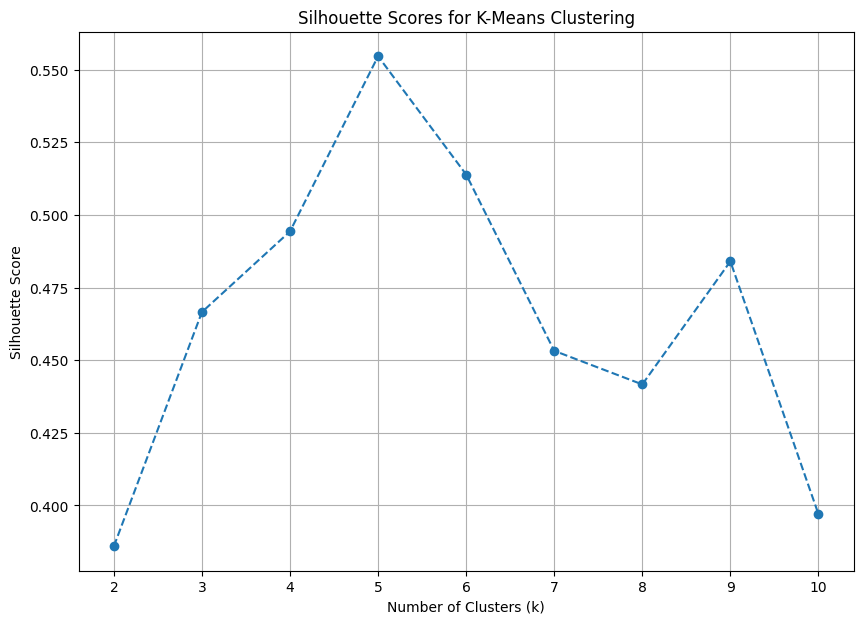

In [33]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(range(2, 11), silhouette_scores, 'o--')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()